In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics, linear_model
from sklearn.cross_validation import train_test_split
import numpy as np
import sklearn.preprocessing as sklp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import itertools

# allow plots to appear directly in the notebook
%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filename = 'C:/Users/billf/Desktop/Data_Science/LinearRegressionPractice/WinTotalPredictor_FourFactors.csv'
data = pd.read_csv(filename, index_col=0)

In [3]:
data.head()

,OeFGper,OTOVper,ORBper,OFT_FGA,DeFGper,DTOVper,DRBper,DFT_FGA,W
Year_Team,,,,,,,,,
2018 Houston Rockets,0.551,12.7,21.3,0.233,0.521,13.4,79.9,0.171,65
2018 Toronto Raptors,0.539,12.1,23.0,0.198,0.501,13.0,77.7,0.212,59
2018 Golden State Warriors,0.569,14.1,21.0,0.195,0.504,12.6,76.3,0.186,58
2018 Utah Jazz,0.527,13.7,21.5,0.202,0.506,14.0,79.8,0.190,48
2018 Philadelphia 76ers,0.535,14.6,25.3,0.198,0.492,12.6,78.6,0.218,52


In [4]:
data.tail()

,OeFGper,OTOVper,ORBper,OFT_FGA,DeFGper,DTOVper,DRBper,DFT_FGA,W
Year_Team,,,,,,,,,
2015 Orlando Magic,0.494,14.0,23.1,0.168,0.514,13.6,76.0,0.210,25
2015 Los Angeles Lakers,0.473,12.1,25.4,0.204,0.518,12.1,76.3,0.231,21
2015 Minnesota Timberwolves,0.468,13.7,26.6,0.240,0.537,13.9,71.6,0.187,16
2015 Philadelphia 76ers,0.459,16.0,25.5,0.195,0.497,15.2,73.0,0.225,18
2015 New York Knicks,0.470,14.0,24.5,0.180,0.512,13.3,73.1,0.234,17


In [5]:
data.shape

(120, 9)

In [6]:
print(data)

                             OeFGper  OTOVper  ORBper  OFT_FGA  DeFGper  \
Year_Team                                                                 
2018 Houston Rockets           0.551     12.7    21.3    0.233    0.521   
2018 Toronto Raptors           0.539     12.1    23.0    0.198    0.501   
2018 Golden State Warriors     0.569     14.1    21.0    0.195    0.504   
2018 Utah Jazz                 0.527     13.7    21.5    0.202    0.506   
2018 Philadelphia 76ers        0.535     14.6    25.3    0.198    0.492   
2018 Oklahoma City Thunder     0.514     12.4    27.7    0.197    0.525   
2018 Boston Celtics            0.518     13.0    21.5    0.188    0.495   
2018 San Antonio Spurs         0.507     12.2    23.7    0.189    0.507   
2018 Portland Trail Blazers    0.511     12.3    23.3    0.192    0.503   
2018 Minnesota Timberwolves    0.523     11.4    24.4    0.225    0.539   
2018 Denver Nuggets            0.536     13.4    25.7    0.198    0.539   
2018 New Orleans Pelicans

In [7]:
predictive_stats = data[['OeFGper','OTOVper','ORBper','OFT_FGA','DeFGper','DTOVper','DRBper','DFT_FGA']]
predictive_stats.head()

,OeFGper,OTOVper,ORBper,OFT_FGA,DeFGper,DTOVper,DRBper,DFT_FGA
Year_Team,,,,,,,,
2018 Houston Rockets,0.551,12.7,21.3,0.233,0.521,13.4,79.9,0.171
2018 Toronto Raptors,0.539,12.1,23.0,0.198,0.501,13.0,77.7,0.212
2018 Golden State Warriors,0.569,14.1,21.0,0.195,0.504,12.6,76.3,0.186
2018 Utah Jazz,0.527,13.7,21.5,0.202,0.506,14.0,79.8,0.190
2018 Philadelphia 76ers,0.535,14.6,25.3,0.198,0.492,12.6,78.6,0.218


In [8]:
predictive_stats = sklp.scale(predictive_stats)
predictive_stats

array([[ 2.03504184, -0.35024239, -0.95508534,  1.34142335,  0.7280964 ,
         0.34726463,  1.83521254, -1.6113972 ],
       [ 1.46190273, -0.96380569, -0.26171378, -0.29114056, -0.42077366,
        -0.04037961,  0.69307178,  0.37758279],
       [ 2.8947505 ,  1.08140532, -1.07744502, -0.43107461, -0.24844315,
        -0.42802385, -0.03374507, -0.88372159],
       [ 0.88876363,  0.67236312, -0.87351221, -0.10456183, -0.13355614,
         0.92873099,  1.78329705, -0.68967477],
       [ 1.27085637,  1.59270807,  0.67637716, -0.29114056, -0.93776518,
        -0.42802385,  1.16031118,  0.66865303],
       [ 0.26786293, -0.65702404,  1.65525466, -0.33778525,  0.95787041,
         1.60710841,  0.53732531, -0.54413965],
       [ 0.4589093 , -0.04346073, -0.87351221, -0.7575874 , -0.76543468,
        -0.04037961,  1.0564802 , -0.64116306],
       [-0.06646822, -0.86154514,  0.02379216, -0.71094271, -0.07611264,
         0.15344251,  1.16031118, -1.6599089 ],
       [ 0.12457815, -0.75928459

In [9]:
predictive_stats=pd.DataFrame(predictive_stats,columns=['OeFGper','OTOVper','ORBper','OFT_FGA','DeFGper','DTOVper',
                                                        'DRBper','DFT_FGA'])
predictive_stats.head()

,OeFGper,OTOVper,ORBper,OFT_FGA,DeFGper,DTOVper,DRBper,DFT_FGA
0,2.035042,-0.350242,-0.955085,1.341423,0.728096,0.347265,1.835213,-1.611397
1,1.461903,-0.963806,-0.261714,-0.291141,-0.420774,-0.040380,0.693072,0.377583
2,2.894751,1.081405,-1.077445,-0.431075,-0.248443,-0.428024,-0.033745,-0.883722
3,0.888764,0.672363,-0.873512,-0.104562,-0.133556,0.928731,1.783297,-0.689675
4,1.270856,1.592708,0.676377,-0.291141,-0.937765,-0.428024,1.160311,0.668653


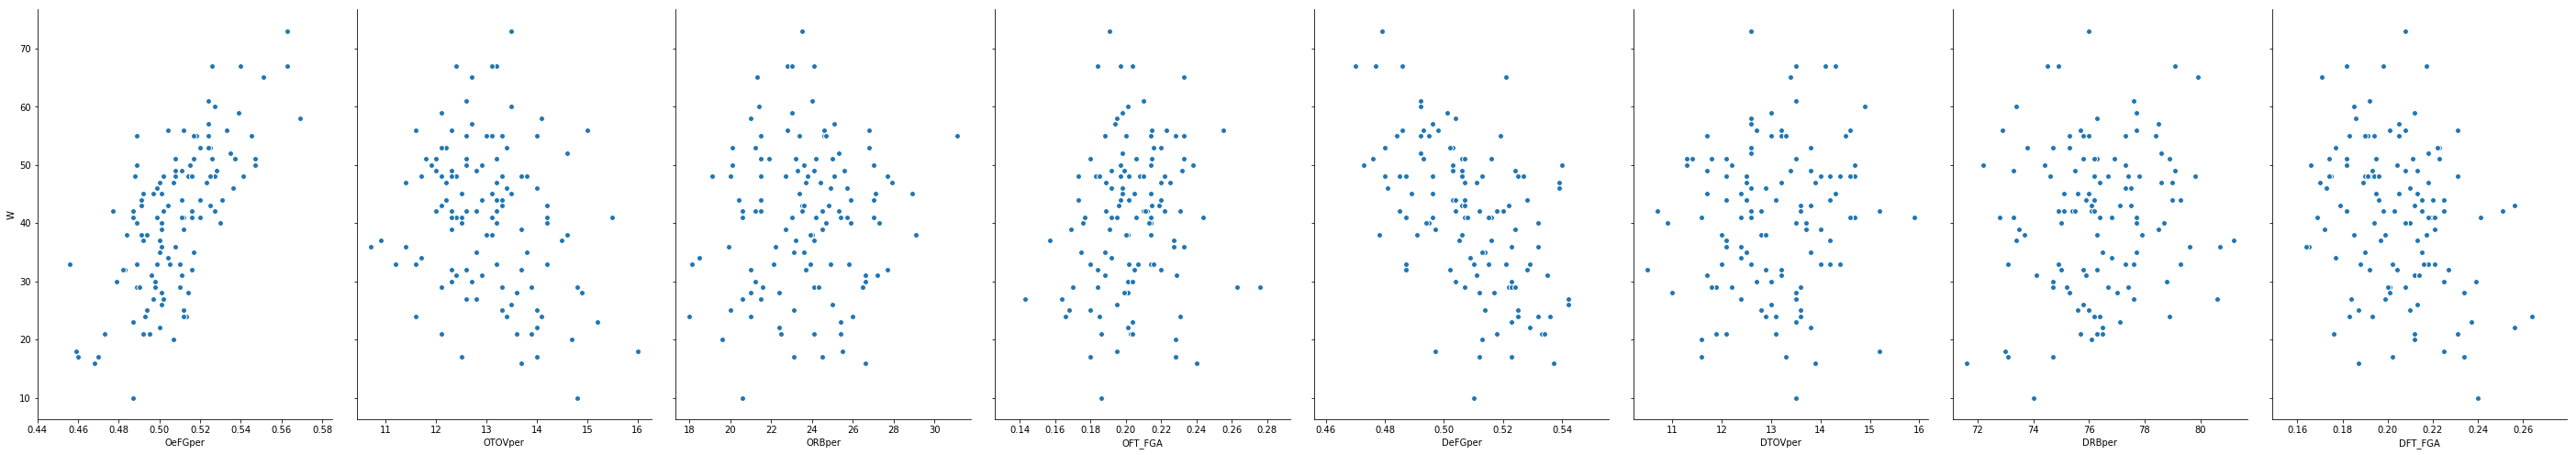

In [10]:
sns.pairplot(data, x_vars=['OeFGper','OTOVper','ORBper','OFT_FGA','DeFGper',
                           'DTOVper','DRBper','DFT_FGA'], y_vars='W', size=7, aspect=0.7)

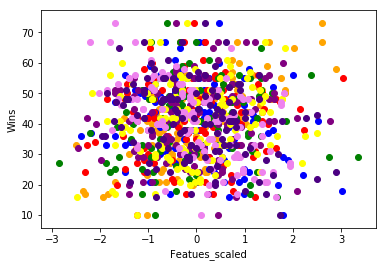

In [11]:
X=predictive_stats
y=data['W']
plt.scatter(X['OeFGper'],y,c="orange")
plt.scatter(X['OTOVper'],y,c="blue")
plt.scatter(X['ORBper'],y,c="red")
plt.scatter(X['OFT_FGA'],y,c="green")
plt.scatter(X['DTOVper'],y,c="purple")
plt.scatter(X['DRBper'],y,c="yellow")
plt.scatter(X['DeFGper'],y,c="violet")
plt.scatter(X['DFT_FGA'],y,c="indigo")
plt.xlabel("Featues_scaled")
plt.ylabel("Wins")
plt.show()

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
predictions=regr.predict(X)
print("The intercept is {}".format(regr.intercept_))
print("The coefficients are {}".format(regr.coef_))
print("\n",predictions)

The intercept is 41.00000000000004
The coefficients are [ 8.43556255 -3.69504071  2.86562845  1.53339804 -6.68866081  3.26240442
  1.55581725 -1.63428323]

 [ 60.53256138  58.84075788  59.33156143  51.17413178  52.91554853
  50.47411624  49.04643327  48.1284455   44.48403671  47.62546441
  42.94110166  46.46728231  45.91112235  43.73953676  42.45100858
  43.00693998  41.9331644   42.90589706  41.97551822  42.46130586
  38.7080314   32.37061791  30.81695883  28.81341925  29.06671101
  26.67490844  22.77532378  22.37924099  21.70514994  17.34305352
  70.74169925  59.47878733  54.70607556  53.82955188  52.49321427
  53.22417175  50.11732009  47.44838368  44.957098    41.42333212
  39.43353497  45.70169548  40.91300552  40.86170383  41.31354725
  40.67676903  42.22435031  40.68960831  37.77797627  40.26955351
  38.19952866  37.63930584  33.12871445  29.75427807  32.85642251
  27.18430162  25.99265944  22.99676976  24.75745837  23.96640478
  69.43619481  68.60634224  58.83448193  54.5561298

In [13]:
list(zip(predictive_stats, regr.coef_))

[('OeFGper', 8.4355625485543015),
 ('OTOVper', -3.6950407097707987),
 ('ORBper', 2.865628451123805),
 ('OFT_FGA', 1.5333980383852686),
 ('DeFGper', -6.6886608143822661),
 ('DTOVper', 3.2624044202532683),
 ('DRBper', 1.5558172477690186),
 ('DFT_FGA', -1.6342832294765666)]

In [14]:
print("Mean squared error: %.2f" % mean_squared_error(y, predictions))
print('Variance score: %.2f' % r2_score(y, predictions))

Mean squared error: 10.70
Variance score: 0.93


In [17]:
scales_data=data[['OeFGper','OTOVper','ORBper','OFT_FGA','DeFGper','DTOVper','DRBper','DFT_FGA']]

#print("The four factors are OeFG%, OTOV%, ORB%, OFT/FGA, DeFG%, DTOV%, DRB%, DFT/FGA")
new_stats= [0.551,12.7,21.3,0.233,0.521,13.4,79.9,0.171]

means=(scales_data.mean(axis=0))
stds=((scales_data.std(axis=0)))

means=list(means)
stds=list(stds)

def new_prediction(stats_array,the_means,the_stds):
    new_list=[]
    for (a, b, c) in zip(stats_array,the_means,the_stds):
        a=((a - b)/c)
        new_list.append(a)
    return new_list
    #print(new_list)
      
user_input_prediction=[new_prediction(new_stats,means,stds)]
print(user_input_prediction,"\n")

print("Predicted win total is {}.".format(int(regr.predict(user_input_prediction))))

[[2.0265447603834419, -0.34877998877866623, -0.95109748830550045, 1.3358223926707153, 0.72505631738237042, 0.3458146680422588, 1.8275498237033234, -1.6046689956266402]] 

Predicted win total is 60.
